In [1]:
#Tarea 3
#Inteligencia Artificial 2024-1, Grupo 1
#Librerias
#importe la librerias pandas como pd
import pandas as pd
#importe ZipFile de la libreria zipfile
from zipfile import ZipFile

import numpy as np
import matplotlib as plt
import seaborn as sns

import os

# de sklearn la librería preprocessing importe OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# de sklearn linear_model importe SGDClassifier
from sklearn.linear_model import SGDClassifier
# de sklearn preprocessing importe StandardScaler y make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [5]:
#1. observamos los archivos que estan en esta carpeta
os.listdir() 

#Notes: Las últimas dos, test.csv y train.csv, no aparecen hasta que se extrae con ayuda de las celdas 2 & 3. 

['.ipynb_checkpoints',
 'spaceship-titanic.zip',
 'Tarea 3.ipynb',
 'test.csv',
 'train.csv']

In [3]:
#2. funcion utilitaria para extraer data
def unzip_data(path):
    with ZipFile(path, 'r') as zipObj:
        zipObj.extractall()

In [4]:
#3. llame la función anterior y extraiga el archivo spaceship-titanic
unzip_data("spaceship-titanic.zip")

In [6]:
#4. utilice read_csv de pandas para leer los archivos extraidos
train_ds = pd.read_csv('train.csv')
test_ds = pd.read_csv('test.csv')

In [7]:
#5. con pandas, observe los primeros 5 datos con la funcion head()
test_ds.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [8]:
#6. con pandas, observe los primeros 5 datos del dataset de prueba
train_ds.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
#7. calcule la cantidad de filas del training set y del test set
ntrain = train_ds.shape[0]
ntest = test_ds.shape[0]

#imprima la cantidad de datos del training set y del test set
print(f'Dataset has {ntrain} train samples')
print(f'Dataset has {ntest} test samples')

Dataset has 8693 train samples
Dataset has 4277 test samples


In [10]:
#8. con info() verifique cuales son los tipos de columnas
train_ds.info()
print("\n"+"-"*100)
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Ra

In [11]:
#9. revise si existen campos nulos en el training set con isnull y sum
ds1 = (train_ds.isnull().sum()[train_ds.isnull().sum()>=0]).to_frame().rename(columns={0:"Number of Missing values"})
ds1

,Number of Missing values
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [36]:
#10. funcion que realiza los reemplazos del dato mas frecuente en la columna (imputer)
def impute_most_frequent_data(df):
    for column_name in df.columns:
        data = df[column_name].value_counts().index[0]
        df[column_name].fillna(data, inplace=True)
    return df

In [38]:
#11. llame la funcion contra el training set
train_ds = impute_most_frequent_data(train_ds)
train_ds.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [39]:
#12. valide nuevamente si existen campos nulos
ds2 = (train_ds.isnull().sum()[train_ds.isnull().sum()>=0]).to_frame().rename(columns={0:"Number of Missing values"})
ds2

,Number of Missing values
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [15]:
#13. Agrupe por planeta y adquiera la columna VIP
home_planet_vs_vip = train_ds.groupby('HomePlanet')['VIP'].sum()
home_planet_vs_vip

HomePlanet
Earth       5
Europa    131
Mars       63
Name: VIP, dtype: int64

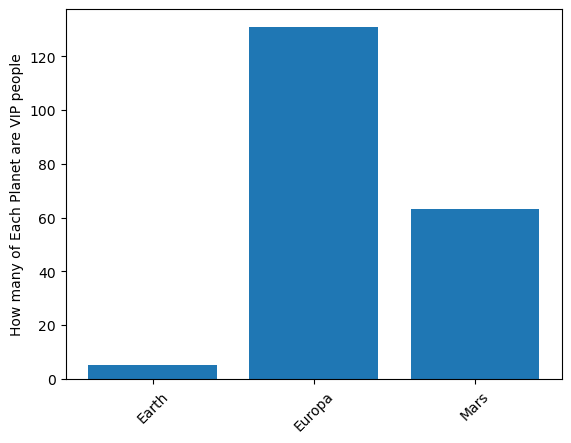

In [16]:
#14. Genere un grafico de barras donde
# x = 'HomePlanet'
# y = cantidad de personas que fueron VIP
# rote los labels a 45°

%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(home_planet_vs_vip.index, home_planet_vs_vip)
ax.set_xticklabels(home_planet_vs_vip.index, rotation=45)
ax.set_ylabel("How many of Each Planet are VIP people")
plt.show()


In [17]:
#15. agrupe por edad y sume para saber cuanto por rango de edad gastaron cada uno
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
age_vs_moneyspent = train_ds.groupby('Age')[exp_cols].sum()
age_vs_moneyspent

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,,,,,
0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
75.0,0.0,493.0,1224.0,131.0,1901.0
76.0,0.0,2732.0,422.0,16594.0,330.0
77.0,0.0,9032.0,131.0,4109.0,1572.0


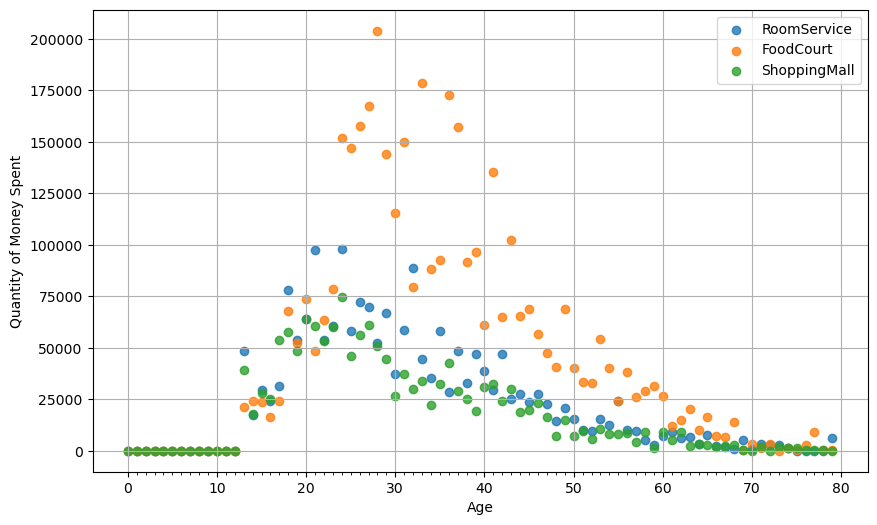

In [18]:
#16. Realize un gráfico de dispersion para ver la cantidad gastada por rango de edades
fig, ax = plt.subplots(figsize=(10,6))

for i in range(len(age_vs_moneyspent.columns)-2):
    ax.scatter(age_vs_moneyspent.index, age_vs_moneyspent.iloc[:,i], alpha=0.8)
    ax.legend(age_vs_moneyspent.columns)
ax.set_xlabel("Age")
ax.set_xticks(ticks=range(0,80), minor=True)
ax.set_ylabel("Quantity of Money Spent")
ax.grid()

plt.show()

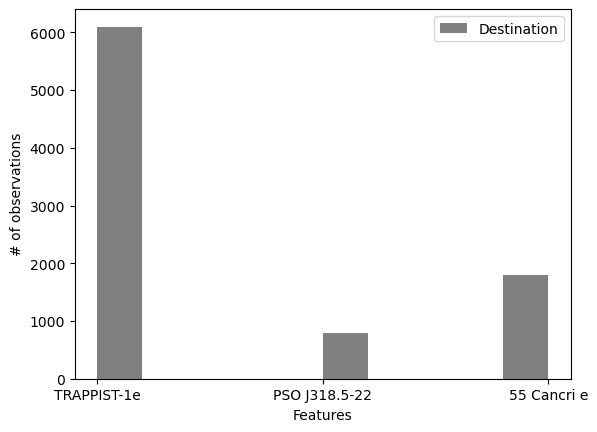

In [19]:
#17. realice un grafico de histograma para los destinos versus las características
fig, ax = plt.subplots()
ax.hist(train_ds['Destination'], label="Destination", color='gray')
ax.set_xlabel("Features")
ax.set_ylabel("# of observations")
ax.legend()
plt.show()

In [20]:
#18. llame a la funcion utilizando el traning set y listando las librerías categoricas 'HomePlanet' y 'Destination'
def column_transform(df, categorical_columns):
    for col in categorical_columns:
        col_ohe = pd.get_dummies(df[col], prefix=col)
        df = pd.concat((df, col_ohe), axis=1).drop(col, axis=1)
    return df

In [41]:
#19. Asigne a train_ds_ohe la funcion y los datos categoricos a filtrar
train_ds_ohe = column_transform(train_ds, categorical_columns = ['HomePlanet','Destination'])
train_ds_ohe.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,True,False,False,False,True
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,False,False,False,False,True
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,True,False,False,False,True
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,True,False,False,False,True
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,False,False,False,False,True


In [22]:
#20. deshagase con drop() de las columnas 'PassengerId', 'Cabin', 'Name' y 'Transported'
# asignela a la variable X
x = train_ds_ohe.drop(['PassengerId', 'Cabin', 'Name', 'Transported'], axis=1)

# asigne del train_ds_ohe solamente la columna transported a la variable y
y = train_ds_ohe['Transported']

In [23]:
#21. llame a make_pipeline con:
# StandardScaler()
# SGDClassifier con max_iter=1000, tol=1e-3
clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=1000, tol=1e-3))
# llame al metodo fit() del clasificador
clf.fit(x,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [51]:
#22. funcion para preprocesar la data antes de realizar predicciones, note que no hacemos escalamientos
def preprocess_test_set(test_ds):
    test_ds = column_transform(test_ds, categorical_columns=['HomePlanet','Destination'])
    test_ds = test_ds.drop(['PassengerId', 'Cabin', 'Name'], axis=1)
    return impute_most_frequent_data(test_ds)

In [58]:
#23. llame la funcion anterior con el test dataset
test_data = preprocess_test_set(test_ds)

In [59]:
#24. calcule las predicciones del clasificador con el metodo predict
y_pred = clf.predict(test_data)

In [60]:
#25. transforme las predicciones en un dataframe y calcule cuantas predicciones
# fueron pasajeros transportados y cuales no fueron transportados
predictions_df = pd.DataFrame({'PassengerId': test_ds['PassengerId'], 'Transported': y_pred})
transported_count = predictions_df['Transported'].sum()
not_transported_count = len(predictions_df) - transported_count

print(f'TRUE: {transported_count}')
print(f'FALSE: {not_transported_count}')

TRUE: 2108
FALSE: 2169
